In [1]:
import pandas as pd
from itertools import product
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
train = pd.read_csv('../html2023-spring-final-project/train.csv')
test = pd.read_csv('../html2023-spring-final-project/test.csv')

In [164]:
train = train.drop(columns=['Danceability'])

In [165]:
total = pd.concat((train, test), axis=0)

In [166]:
total.head(2)

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,117907.0,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,173427.0,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver


In [167]:
pd.isna(total).sum()/len(total) * 100

Energy              15.001065
Key                 15.001065
Loudness            15.001065
Speechiness         15.001065
Acousticness        15.001065
Instrumentalness    15.001065
Liveness            15.001065
Valence             15.001065
Tempo               15.001065
Duration_ms         15.001065
Views               15.001065
Likes               15.001065
Stream              15.001065
Album_type          15.001065
Licensed            15.001065
official_video      15.001065
id                   0.000000
Track               15.001065
Album               15.001065
Uri                 15.001065
Url_spotify         15.001065
Url_youtube         15.001065
Comments            15.001065
Description         15.001065
Title               15.001065
Channel             15.001065
Composer            15.001065
Artist              15.001065
dtype: float64

In [168]:
total.drop(columns=['Uri', 'Url_spotify', 'Url_youtube'], inplace=True)

In [169]:
total['Licensed']  = total['Licensed'] .replace({True: 1, False: 0})

In [170]:
total['Licensed']  = total['Licensed'] .replace({True: 1, False: 0})
labelArtist	 = {}
for index, i in enumerate(total['Artist'].unique()):
    labelArtist	[i] = index

labelComposer = {}
for index, i in enumerate(total['Composer'].unique()):
    labelComposer[i] = index

labelAlbum = {}
for index, i in enumerate(total['Chanel'].unique()):
    labelAlbum[i] = index

labelchannel = {}
for index, i in enumerate(total["Channel"].unique()):
    labelAlbum[i] =  index

total['Artist']  = total['Artist'] .replace(labelArtist)
total['Composer']  = total['Composer'] .replace(labelComposer)
total['Album_type']  = total['Album_type'] .replace(labelAlbum)
total['Channel']  = total['Channel'] .replace(labelchannel)

In [8]:
total['Artist'] = total['Artist'].replace({9: np.nan})
total['Composer'] = total['Composer'].replace({0: np.nan})

In [11]:
labelAlbum

{'album': 0,
 nan: 4,
 'single': 2,
 'compilation': 3,
 'Mozafunkula': 0,
 'Anton Paisov': 1,
 'robbiewilliamsvevo': 2,
 'RobbieWilliamsLove': 3,
 'Mies10': 5,
 'Patrick Watson - Topic': 6,
 'Secret City Records': 7,
 "i'm cyborg but that's ok": 8,
 'Domino Recording Co.': 9,
 'ThePussycatDollsVEVO': 10,
 'BustaRhymesVEVO': 11,
 'Busta Rhymes Videos': 12,
 'Dr. Dre': 13,
 'DOMiAndJDBeckVEVO': 14,
 'PaulMcCartneyVEVO': 15,
 'RihannaVEVO': 16,
 'Paul McCartney - Topic': 17,
 'TheArMaGeDdOn007': 18,
 'Oswaldo Gutiérrez': 19,
 'EnanitosVerdesVEVO': 20,
 'Los Enanitos Verdes Catálogo': 21,
 'huevosrevueltosVEVO': 22,
 'VideoMusic.': 23,
 'Butterfly Rock': 24,
 'MezclandoPorHaiti': 25,
 'Hombres G - Topic': 26,
 'Manu Guinarte': 27,
 'Asthmatic Kitty Records': 28,
 'SonySoundtracksVEVO': 29,
 'Sufjan Stevens - Topic': 30,
 'Ariel Turner': 31,
 'Adam Romano': 32,
 'jpgkids': 33,
 'The Codfather': 34,
 'Prince': 35,
 'princevevo': 36,
 'Old But Gold - Musik Nostalgie': 37,
 'BoneyMVEVO': 38,
 

In [172]:
total.corr()

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Licensed,id,Comments,Composer,Artist
Energy,1.000000,0.030984,0.521536,0.035105,-0.429359,-0.162493,0.122516,0.288740,0.139002,0.008672,0.048940,0.046533,0.026511,0.025961,0.053521,-0.104076,0.033764,0.021041,-0.006936
Key,0.030984,1.000000,0.028663,0.021740,-0.034132,-0.005333,0.006171,0.044836,0.017334,-0.005898,0.014882,0.015647,0.000474,0.005869,-0.010413,-0.032320,0.007641,-0.003986,-0.015030
Loudness,0.521536,0.028663,1.000000,0.061853,-0.586900,-0.523715,0.035705,0.301555,0.132533,0.003268,0.116236,0.128086,0.125085,0.044704,0.096923,0.038260,0.051786,0.092259,0.005101
Speechiness,0.035105,0.021740,0.061853,1.000000,-0.129310,-0.090352,0.029526,0.057229,0.053713,-0.061945,-0.015586,0.009462,-0.019951,0.022744,-0.071295,0.090662,0.009479,0.071887,-0.003307
Acousticness,-0.429359,-0.034132,-0.586900,-0.129310,1.000000,0.396090,-0.033404,-0.277558,-0.126865,-0.017521,-0.078645,-0.081835,-0.099861,-0.016233,-0.049452,0.021540,-0.036693,-0.088878,-0.004138
Instrumentalness,-0.162493,-0.005333,-0.523715,-0.090352,0.396090,1.000000,-0.022980,-0.262821,-0.080309,0.005642,-0.092611,-0.092769,-0.105477,-0.011632,-0.069031,0.064970,-0.034278,-0.070253,0.002055
Liveness,0.122516,0.006171,0.035705,0.029526,-0.033404,-0.022980,1.000000,0.024289,0.005084,-0.002284,-0.007163,-0.017636,-0.040066,-0.012594,-0.002008,-0.048359,-0.013339,-0.024111,-0.000188
Valence,0.288740,0.044836,0.301555,0.057229,-0.277558,-0.262821,0.024289,1.000000,0.097350,-0.053227,0.044711,0.028246,0.003496,0.005082,-0.005058,-0.100077,0.017096,0.133591,-0.006422
Tempo,0.139002,0.017334,0.132533,0.053713,-0.126865,-0.080309,0.005084,0.097350,1.000000,-0.021609,0.003878,0.006600,0.009532,-0.006436,0.011782,-0.061636,0.006013,-0.020582,0.001167
Duration_ms,0.008672,-0.005898,0.003268,-0.061945,-0.017521,0.005642,-0.002284,-0.053227,-0.021609,1.000000,0.024545,0.008595,-0.012448,-0.002411,0.037520,-0.055356,0.006284,-0.014967,0.013344


In [173]:
testValenceComposer = total[['Valence', 'Loudness',  'Instrumentalness', 'Composer']]

In [174]:
testValenceComposer['Composer'] = testValenceComposer['Composer'].replace({0: np.nan})

C:\Users\Miguel\AppData\Local\Temp\ipykernel_31308\2684249148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testValenceComposer['Composer'] = testValenceComposer['Composer'].replace({0: np.nan})


In [45]:
# minX -60  maxX = 0  ~ 0 - 1
    # y = (-1/60) x
def scaleMinMaxLoudness(data):
    return -data/60

In [176]:
testValenceComposer['Loudness'] = testValenceComposer['Loudness'] .apply(scaleMinMaxLoudness)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_31308\2886056747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testValenceComposer['Loudness'] = testValenceComposer['Loudness'] .apply(scaleMinMaxLoudness)


In [177]:
pd.isna(testValenceComposer).sum()

Valence             3523
Loudness            3523
Instrumentalness    3523
Composer            3523
dtype: int64

In [178]:
testValenceComposer = testValenceComposer.dropna(axis=0)

In [179]:
pd.isna(testValenceComposer).sum()

Valence             0
Loudness            0
Instrumentalness    0
Composer            0
dtype: int64

In [185]:
grouped = testValenceComposer.groupby(by="Composer").count()

In [200]:
X = testValenceComposer[['Valence', 'Loudness', 'Instrumentalness']].to_numpy()
y = testValenceComposer['Composer'].to_numpy().reshape((-1, 1))

In [201]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_p = poly.fit_transform(X)

In [203]:
train_X, test_X, train_Y, test_Y = train_test_split(X_p, y , test_size = 0.20, random_state = 123)

In [205]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=1000, solver='liblinear')
logisticRegr.fit(train_X, train_Y.ravel())


LogisticRegression(max_iter=1000, solver='liblinear')

In [206]:
prediction = logisticRegr.predict(test_X)

In [207]:
prediction

array([7., 1., 1., ..., 7., 1., 7.])

In [209]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, prediction)
mse


13.395443449959316

# Testing MiceForest

In [212]:
! pip install miceforest

     -------------------------------------- 58.0/58.0 kB 507.6 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 865.0 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 997.1 kB/s eta 0:00:00


In [180]:
train = pd.read_csv('../html2023-spring-final-project/train.csv')
test = pd.read_csv('../html2023-spring-final-project/test.csv')
train = train.drop(columns=['Danceability'])
total = pd.concat((train, test), axis=0)


In [181]:
trainData = pd.read_csv('../html2023-spring-final-project/train.csv')
print(trainData.shape)

(17170, 29)


In [182]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23485 entries, 0 to 6314
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Energy            19962 non-null  float64
 1   Key               19962 non-null  float64
 2   Loudness          19962 non-null  float64
 3   Speechiness       19962 non-null  float64
 4   Acousticness      19962 non-null  float64
 5   Instrumentalness  19962 non-null  float64
 6   Liveness          19962 non-null  float64
 7   Valence           19962 non-null  float64
 8   Tempo             19962 non-null  float64
 9   Duration_ms       19962 non-null  float64
 10  Views             19962 non-null  float64
 11  Likes             19962 non-null  float64
 12  Stream            19962 non-null  float64
 13  Album_type        19962 non-null  object 
 14  Licensed          19962 non-null  object 
 15  official_video    19962 non-null  object 
 16  id                23485 non-null  int64  

In [183]:
data = total[['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness','Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', "Views", "Likes", 'Stream']]

In [184]:
data

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
0,0.000273,3.0,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,1.376220e+05,1.998137e+07
1,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN
2,NaN,6.0,-15.596000,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07
3,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08
4,NaN,5.0,NaN,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07
6311,0.318585,10.0,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07
6312,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07
6313,0.204440,NaN,-11.563964,0.037676,0.003631,0.491785,0.030605,0.482987,NaN,180639.352865,1.728134e+07,NaN,1.199593e+08


In [185]:
def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

data['Loudness'] = data['Loudness'].apply(lambda x: convert_decibel_to_numerical(x))

C:\Users\Miguel\AppData\Local\Temp\ipykernel_38116\614249544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loudness'] = data['Loudness'].apply(lambda x: convert_decibel_to_numerical(x))


In [186]:
data.corr()

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
Energy,1.000000,0.030984,0.594148,0.035105,-0.429359,-0.162493,0.122516,0.288740,0.139002,0.008672,0.048940,0.046533,0.026511
Key,0.030984,1.000000,0.030885,0.021740,-0.034132,-0.005333,0.006171,0.044836,0.017334,-0.005898,0.014882,0.015647,0.000474
Loudness,0.594148,0.030885,1.000000,0.035381,-0.412443,-0.287820,0.033670,0.245875,0.108800,-0.025321,0.116160,0.136093,0.108554
Speechiness,0.035105,0.021740,0.035381,1.000000,-0.129310,-0.090352,0.029526,0.057229,0.053713,-0.061945,-0.015586,0.009462,-0.019951
Acousticness,-0.429359,-0.034132,-0.412443,-0.129310,1.000000,0.396090,-0.033404,-0.277558,-0.126865,-0.017521,-0.078645,-0.081835,-0.099861
Instrumentalness,-0.162493,-0.005333,-0.287820,-0.090352,0.396090,1.000000,-0.022980,-0.262821,-0.080309,0.005642,-0.092611,-0.092769,-0.105477
Liveness,0.122516,0.006171,0.033670,0.029526,-0.033404,-0.022980,1.000000,0.024289,0.005084,-0.002284,-0.007163,-0.017636,-0.040066
Valence,0.288740,0.044836,0.245875,0.057229,-0.277558,-0.262821,0.024289,1.000000,0.097350,-0.053227,0.044711,0.028246,0.003496
Tempo,0.139002,0.017334,0.108800,0.053713,-0.126865,-0.080309,0.005084,0.097350,1.000000,-0.021609,0.003878,0.006600,0.009532
Duration_ms,0.008672,-0.005898,-0.025321,-0.061945,-0.017521,0.005642,-0.002284,-0.053227,-0.021609,1.000000,0.024545,0.008595,-0.012448


# imputation

In [187]:
from miceforest import ImputationKernel

kds = ImputationKernel(
data = data,
save_all_iterations = True,
random_state = 2023
)

In [188]:
# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
test = kds.complete_data()

In [189]:
test

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
0,0.000273,3.0,0.003037,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,3.435687e+07,1.376220e+05,1.998137e+07
1,0.184220,7.0,0.090071,0.038200,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,3.574337e+06
2,0.023640,6.0,0.027568,0.031400,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07
3,0.209585,6.0,0.237083,0.027700,0.003796,0.000000,0.001000,0.583000,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08
4,0.018082,5.0,0.158234,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,1.760298e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.230840,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07
6311,0.318585,10.0,0.384719,0.073000,0.007420,0.000817,0.008843,0.614366,79.396000,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07
6312,0.426223,5.0,0.262570,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07
6313,0.204440,8.0,0.069760,0.037676,0.003631,0.491785,0.030605,0.482987,101.000000,180639.352865,1.728134e+07,1.975370e+05,1.199593e+08


In [190]:
pd.isna(test).sum()

Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Stream              0
dtype: int64

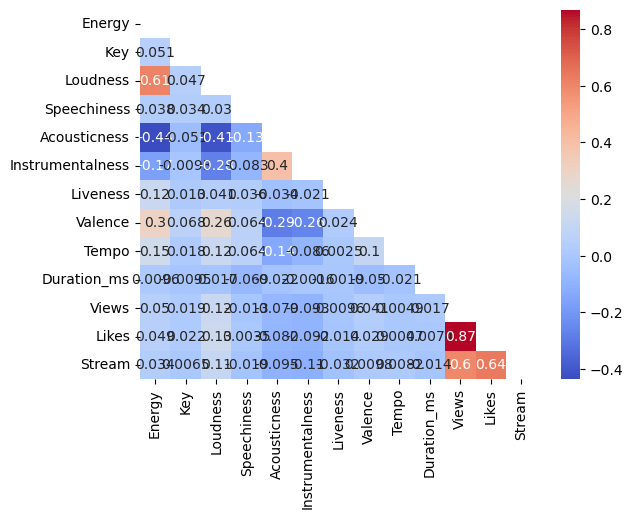

In [191]:
mask = np.triu(np.ones_like(test.corr()))
dataplot = sns.heatmap(test.corr(), cmap="coolwarm", annot=True, mask=mask)

In [165]:

# test['Loudness'] = test['Loudness'] .apply(scaleMinMaxLoudness)

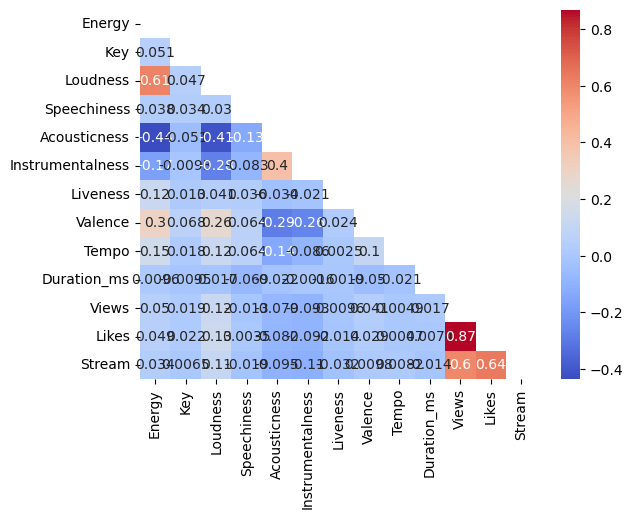

In [192]:
mask = np.triu(np.ones_like(test.corr()))
dataplot = sns.heatmap(test.corr(), cmap="coolwarm", annot=True, mask=mask)

In [193]:
encoder = MinMaxScaler()
encoded = encoder.fit_transform(test)

In [194]:
newEncoded = pd.DataFrame(encoded, columns=test.columns)

In [195]:
newEncoded

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
0,0.000273,0.3,0.001414,0.045954,0.724176,0.000062,0.000807,0.340489,0.342677,0.102446,0.135254,0.113703,0.178871
1,0.184220,0.7,0.042256,0.039627,0.672244,0.910000,0.034966,0.747073,0.610966,0.113610,0.131581,0.111386,0.174870
2,0.023640,0.6,0.012925,0.032573,0.667650,0.867000,0.001772,0.380547,0.348845,0.109033,0.131581,0.111386,0.178710
3,0.209585,0.6,0.111244,0.028734,0.003797,0.000000,0.001000,0.583839,0.617244,0.132024,0.153322,0.128741,0.271479
4,0.018082,0.5,0.074243,0.026971,0.000003,0.000467,0.002924,0.295424,0.402663,0.131796,0.165600,0.134026,0.216933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,0.7,0.108314,0.047148,0.317703,0.006016,0.001642,0.160483,0.296406,0.125735,0.132597,0.112311,0.178266
23481,0.318585,1.0,0.180524,0.075726,0.007420,0.000817,0.008843,0.615250,0.326233,0.106632,0.136476,0.112559,0.177329
23482,0.426223,0.5,0.123204,0.075629,0.661731,0.898308,0.000662,0.087407,0.361460,0.116107,0.131190,0.111698,0.178508
23483,0.204440,0.8,0.032725,0.039083,0.003631,0.491785,0.030605,0.483681,0.415003,0.115060,0.133418,0.114751,0.203257


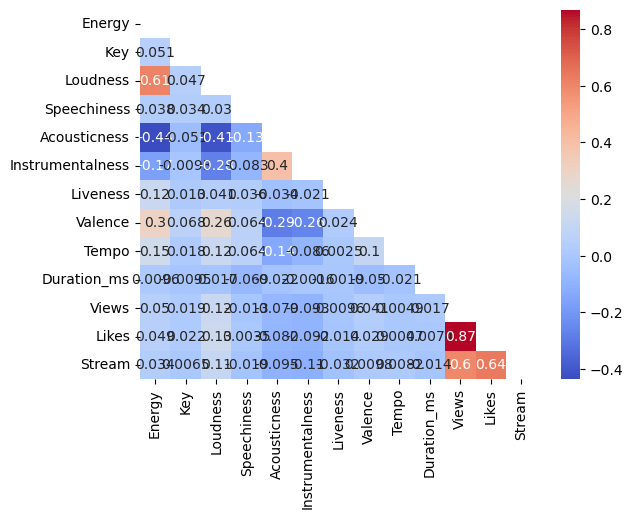

In [196]:
mask = np.triu(np.ones_like(test.corr()))
dataplot = sns.heatmap(newEncoded.corr(), cmap="coolwarm", annot=True, mask=mask)

In [202]:
newEncodedData = newEncoded.loc[0:len(train) -1,:]
newEncodedData = pd.concat((trainData['Danceability'], newEncodedData), axis=1)

In [203]:
x = newEncodedData.iloc[:, 1:]
y = newEncodedData['Danceability']

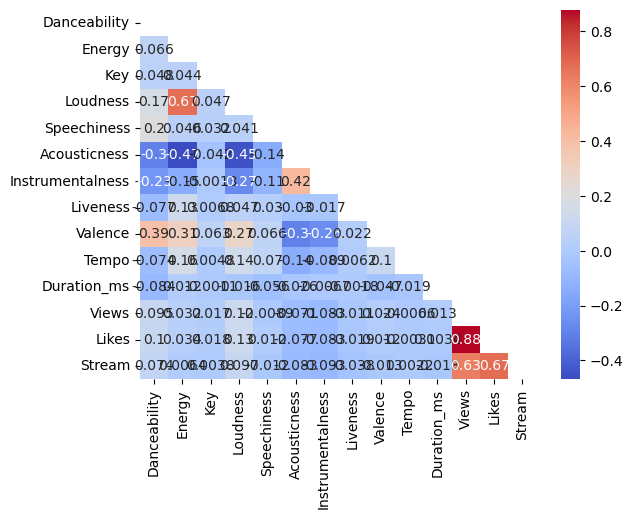

In [204]:
mask = np.triu(np.ones_like(newEncodedData.corr()))
dataplot = sns.heatmap(newEncodedData.corr(), cmap="coolwarm", annot=True, mask=mask)

In [206]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 123)

In [207]:
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

In [211]:
LogReg_clf = LogisticRegression(max_iter=1000)
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

LogReg_pred = LogReg_clf.predict(X_val)
DTree_pred = DTree_clf.predict(X_val)
SVC_pred = SVC_clf.predict(X_val)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = accuracy_score(y_val, averaged_preds)
print(acc)

0.21432731508444963


In [220]:
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)

In [221]:
acc = accuracy_score(y_val, preds)
print("Accuracy is: " + str(acc))

Accuracy is: 0.21258008153756552


In [223]:
k_folds = KFold(n_splits=20, shuffle=True)

num_estimators = [20, 40, 60, 80, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12)
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.21891362284152588
Results for 40 estimators:
0.224300949325457
Results for 60 estimators:
0.2173844959069092
Results for 80 estimators:
0.22080304361295355
Results for 100 estimators:
0.2210242487512784


In [253]:
logreg_bagging_model = BaggingClassifier(base_estimator=LogReg_clf, n_estimators=50, random_state=12)
dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=50, random_state=12)
random_forest = RandomForestClassifier(n_estimators=100, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, shuffle=True, random_state=12)
    results = cross_val_score(model, X_train, y_train, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

KeyboardInterrupt: 

In [226]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [232]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 22}


In [233]:
prediction = knn_gs.predict(X_val)
acc = accuracy_score(y_val, prediction)
print(acc)

0.20762958648806057


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [234]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_

prediction = rf_gs.predict(X_val)
acc = accuracy_score(y_val, prediction)
print(acc)

0.2874199184624345


In [235]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression(max_iter=1000)
#fit the model to the training data
log_reg.fit(X_train, y_train)

prediction = log_reg.predict(X_val)
acc = accuracy_score(y_val, prediction)
print(acc)

0.20937682003494468


In [236]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [237]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_val, y_val)

c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.24111822947000583

In [241]:
! pip install xgboost

     -------------------------------------- 70.9/70.9 MB 919.2 kB/s eta 0:00:00


In [242]:
import lightgbm as lgb
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [240]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}

In [244]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(X_train, np.ravel(y_train))
    pred = reg.predict(X_val)
    accuracy = accuracy_score(np.ravel(y_val), np.rint(pred))
    mae = mean_absolute_error(np.ravel(y_val), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.364298,0.204426
ExtraTreesClassifier,1.951660,0.283925
LGBWrapper,1.720734,0.179965
RandomForestRegressor,1.719278,0.180547
RandomForestRegressor,1.719569,0.177635
XGBRegressor,1.773151,0.159872
OneVsOneClassifier,2.047175,0.226849


In [245]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_l2 = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_l2:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(X_train, np.ravel(y_train))
    pred = reg.predict(X_val)
    accuracy = accuracy_score(np.ravel(y_val), np.rint(pred))
    mae = mean_absolute_error(np.ravel(y_val), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2

Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier
Processing Regressor: SVC


,mae,accuracy
regressors,,
LGBWrapper,1.720734,0.179965
RandomForestRegressor,1.719278,0.180547
RandomForestRegressor,1.719569,0.177635
XGBRegressor,1.773151,0.159872
OneVsOneClassifier,2.490390,0.201223
SVC,2.345952,0.202097


In [247]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_all= [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=100, random_state=42),
    RandomForestRegressor(n_estimators=500, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
    LGBWrapper(params, num_boost_round=500),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_all:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(X_train, np.ravel(y_train))
    pred = reg.predict(X_val)
    accuracy = accuracy_score(np.ravel(y_val), np.rint(pred))
    mae = mean_absolute_error(np.ravel(y_val), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier
Processing Regressor: SVC


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.359348,0.201223
ExtraTreesClassifier,1.922831,0.287711
LGBWrapper,1.720734,0.179965
RandomForestRegressor,1.732673,0.175597
RandomForestRegressor,1.724811,0.176471
XGBRegressor,1.773151,0.159872
OneVsOneClassifier,2.047175,0.226849
LGBWrapper,1.710542,0.183751
RandomForestRegressor,1.719278,0.180547


In [248]:
test = newEncoded.loc[len(train):,:]

In [249]:
test

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
17170,0.350403,0.6,0.100802,0.183610,5.842970e-07,0.002330,0.230346,0.369531,0.569330,0.123506,0.206108,0.220149,0.427720
17171,0.347429,0.8,0.122993,0.031328,3.008126e-02,0.000687,0.000099,0.853226,0.381149,0.118988,0.139301,0.118559,0.249630
17172,0.786330,0.1,0.189843,0.054149,7.676825e-05,0.000299,0.001561,0.551793,0.443823,0.122000,0.132468,0.116232,0.189380
17173,0.403583,0.2,0.123135,0.026971,3.441701e-15,0.509000,0.000262,0.578832,0.494810,0.125764,0.150400,0.142591,0.280016
17174,0.334255,0.8,0.064364,0.177386,1.619483e-05,0.000000,0.000340,0.525755,0.690108,0.147290,0.198038,0.219736,0.324553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,0.7,0.108314,0.047148,3.177030e-01,0.006016,0.001642,0.160483,0.296406,0.125735,0.132597,0.112311,0.178266
23481,0.318585,1.0,0.180524,0.075726,7.419850e-03,0.000817,0.008843,0.615250,0.326233,0.106632,0.136476,0.112559,0.177329
23482,0.426223,0.5,0.123204,0.075629,6.617309e-01,0.898308,0.000662,0.087407,0.361460,0.116107,0.131190,0.111698,0.178508
23483,0.204440,0.8,0.032725,0.039083,3.630992e-03,0.491785,0.030605,0.483681,0.415003,0.115060,0.133418,0.114751,0.203257


In [250]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors_all, test)

In [251]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)